# Analysis of Games Over the Years

## Introduction: 

 Historical data of different games from 1980 - 2016 will be used to analyze users'gaming patterns and games' sales to determine which game will succeed. I will be focusing on games that were released from 2010-2016 because that is most recent and relevant to our current generation. I will analyze revenue, user rating, critic rating, and popular genre. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import scipy.stats as stats

In [2]:
df=pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#changing column names to lower case
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#checking columns type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

There are 6 columns with missing values: name, year_of_release, genre, critic_score, user_score, rating, and year. The next step is to check for null values and then fill the missing and null values with its appropriate values. 

In [7]:
#changing year_of_release from float --> int
df['year_of_release']=df['year_of_release'].fillna(0).astype('int')
#changing user_score from object--> float 
#'tbd' is changed to NaN and then it then fill as 0
df['user_score']=pd.to_numeric(df['user_score'], errors='coerce').fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
#filling name column with "unknown" bc it an object type so we cant fill it with a numerical value.
df['name'] = df['name'].fillna('unknown')
#filling genre and rating columns with "unknown" bc it an object type so we cant fill it with a numerical value.
df['genre'] = df['genre'].fillna('unknown')
#filling user and critic score with 0
df['critic_score'] = df['critic_score'].fillna(0)
#filling rating column with "unknown" bc it an object type so we cant fill it with a numerical value.
df['rating'] = df['rating'].fillna('unknown')

Missing values could occur due to various reasons such as imcomplete data collection and entry. We should unknown for object columns because we cant fill it with a numerical value or drop the values that will drop the rows, which will delete relevant informations.'tbd' in 'user_score' column is changed to NaN when used to_numeric to the column. Then NaN is then filled as 0 for the column.

In [9]:
# Reviewer's code 2

df['user_score'].unique()

array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

In [10]:
df.duplicated().sum()

0

In [11]:
#checking to see if there are any missing values left 
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [12]:
#calculating the total sale of each game
df['total_sales'] = df['na_sales'] + df['jp_sales'] + df['eu_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,unknown,0.01


First, I looked over at the data and cleaned up the datasets to make sure it is cleaned for analysis. I checked for missing values, duplicates, and replaced the missing values with the appropriate values. I also added all the regions sales to get the total sales. Next, I will determine which platform makes the most popular sale within the interested years and which platform is no longer platform. 

## Calculating Top Platforms and Sales

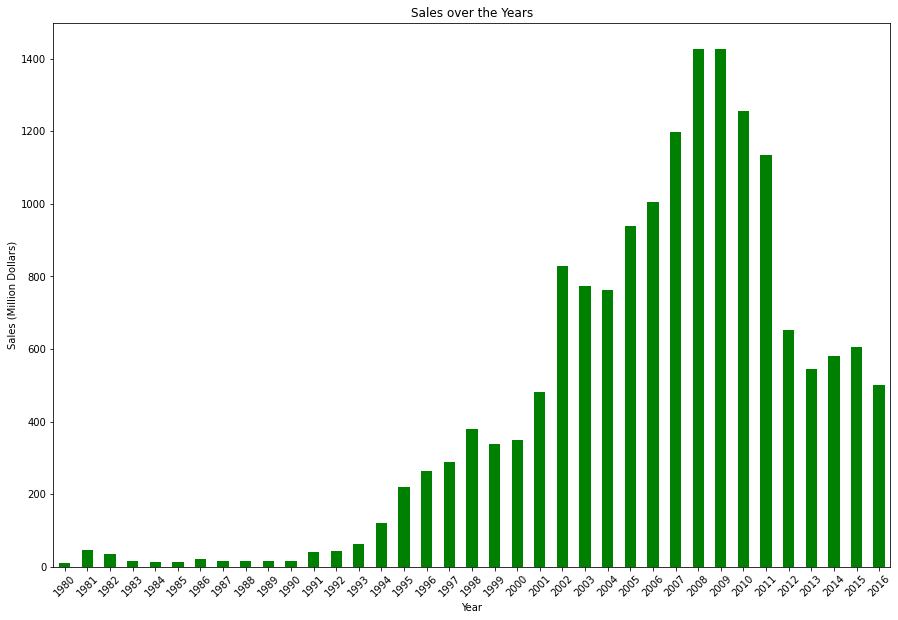

In [13]:
games_year = df.groupby('year_of_release')['year_of_release'].count().drop(0)
games_year.plot(kind='bar', title='Sales over the Years', xlabel='Year', ylabel='Sales (Million Dollars)', figsize=[15,10], color='green')
plt.xticks(rotation= 45)
plt.show()

There is an upward trend of release of games. With 2006-2011 releasing the most games, and a slight drop in 2012. 

In [14]:
platform_totalsale = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_totalsale

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


PS2, x360, and PS3,Wii, and DS have the most total sales. With it I will group the sales by each year. 

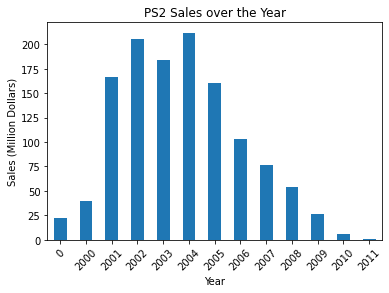

In [15]:
PS2_sales = df[df['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum()
PS2_sales.plot(kind='bar', title='PS2 Sales over the Year', xlabel='Year', ylabel='Sales (Million Dollars)')
plt.xticks(rotation= 45)
plt.show()

The graph shows that PS2 made the most sales from 2001 to 2004, then there a continuous decline from 2005. In 2011, it makes little to no sale. With the provided bar graph, PS2 used to be the most popular platform and now with the relased of new gaming platforms, it has declined in popularity.  

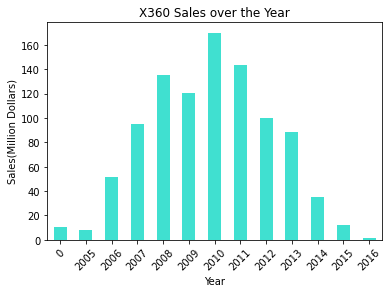

In [16]:
X360_sales = df[df['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum()
X360_sales.plot(kind='bar', title='X360 Sales over the Year', xlabel='Year', ylabel='Sales(Million Dollars)', color='turquoise')
plt.xticks(rotation= 45)
plt.show()

X360 made the most sale in 2010. It severely declined in 2012. However, it continue to make sales; whereas, PS2 stop making revenue in 2011. Another note is 2360 is release later than PS2. PS2 was released in 2000 and x360 was released in 2005 

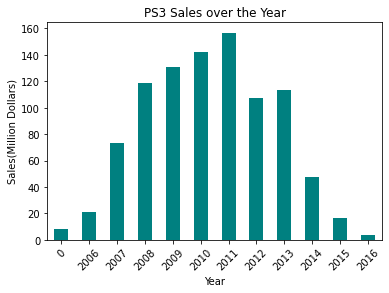

In [17]:
PS3_sales = df[df['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum()
PS3_sales.plot(kind='bar', title='PS3 Sales over the Year', xlabel='Year', ylabel='Sales(Million Dollars)', color='teal')
plt.xticks(rotation= 45)
plt.show()

PS3 was released in 2006, which correlates with the declined in sales for PS2 onward. PS3 made the most sale in 2011 and dropped in 2014. 

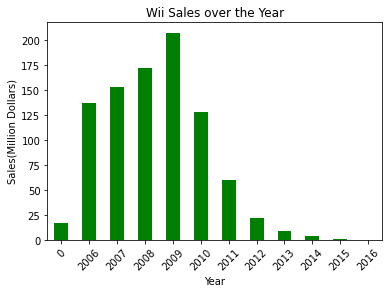

In [18]:
Wii_sales = df[df['platform'] == 'Wii'].groupby('year_of_release')['total_sales'].sum()
Wii_sales.plot(kind='bar', title='Wii Sales over the Year', xlabel='Year', ylabel='Sales(Million Dollars)', color='green')
plt.xticks(rotation= 45)
plt.show()

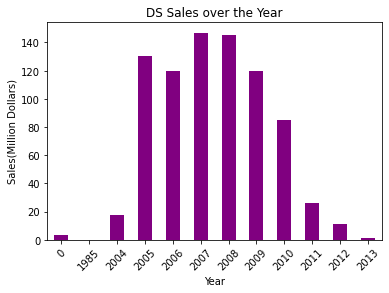

In [19]:
DS_sales = df[df['platform'] == 'DS'].groupby('year_of_release')['total_sales'].sum()
DS_sales.plot(kind='bar', title='DS Sales over the Year', xlabel='Year', ylabel='Sales(Million Dollars)', color='purple')
plt.xticks(rotation= 45)
plt.show()

The platforms that used to be popular and no longer made sales were Wii, PS2, and the DS. While PS3 and XBox360 have declined in sales, they still made some sales in 2016. These platforms were popular in the early and mid 2000s. The Wii stop makind sales in 2016, DS in the 2014, and PS2 in 2012. It takes about 9-10 years for old platforms to fade and stop making sales. New platforms appear every 4-5 years. 

## Df2: 2013-2016 data

In [20]:
#choosing 2013-2016 as the years of the interested bc it is most recent and revelant
#it is also after there is a huge drop in sales and kind of stabilized after. 
df2 = df[df['year_of_release'] >= 2013].reset_index()
df2

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,unknown,14.60
4,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
2229,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
2230,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
2231,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01


In [21]:
sales=df2.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
sales

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

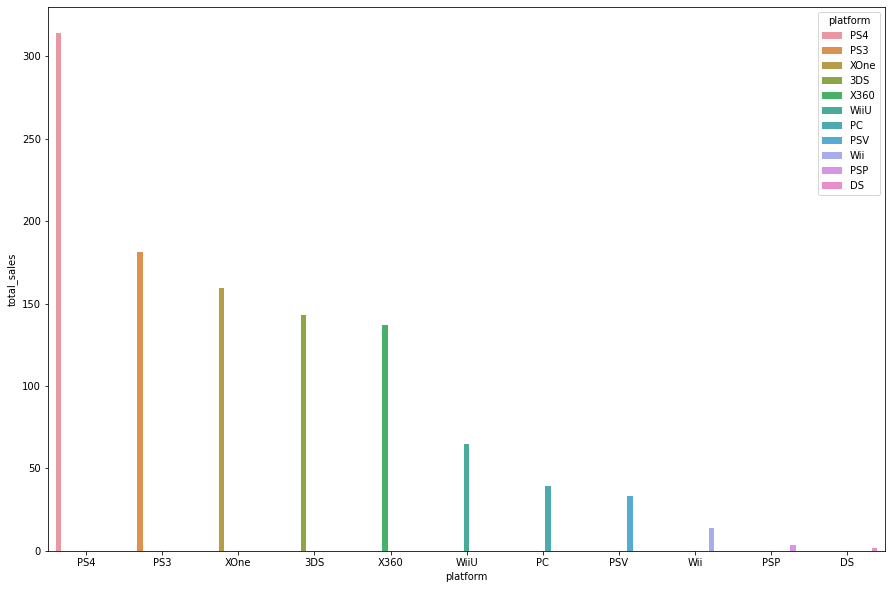

In [22]:
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(x='platform',y='total_sales', hue='platform', data=sales)

In [23]:
pivot_data = df2.pivot_table(index='platform',
                             columns='year_of_release',
                             values='total_sales',
                             aggfunc='sum')
pivot_data

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


x360 and PS3 used to the most popular platforms in 2013, making twice or thrice in sales than other platform. However with the released with PS4, they slowly declined in popularity. Currently, the most popular platform is PS4 with over $100 millions dollar in sale in 2015 and $60 millions in 2016. However, the longer a product is in the market, its sale continue to drop. A trend that we see with all the platforms except for XONE because it had a surge in sales for 2014 and 2015 then declined in 2016. Therefore, in total, it made more than X360 from 2013-2016. Since the sales of each platform keeps dropping each year, a new released of new gaming platform would help with revenue. Currently, PS4 has the biggest sale, and the PS series has the most profitable revenue. A release of PS5 can produce a profitable revenue. XOne and 3DS have continue to decrease in sales but they are the second and third top sales in 2016. 

In [24]:
#checking to see the top platforms btw 2013-2016
top_platforms = df2.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
top_platforms_mean = df.groupby('platform')['total_sales'].mean()
merge = top_platforms.merge(top_platforms_mean, on='platform') 
merge_1 = merge.rename(columns={'total_sales_y':'mean','total_sales_x':'total_sales'})
merge_1.head(5)

,platform,total_sales,mean
0,PS4,314.14,0.801378
1,PS3,181.43,0.705973
2,XOne,159.32,0.645020
3,3DS,143.25,0.498077
4,X360,136.80,0.769746


(0.0, 10.0)

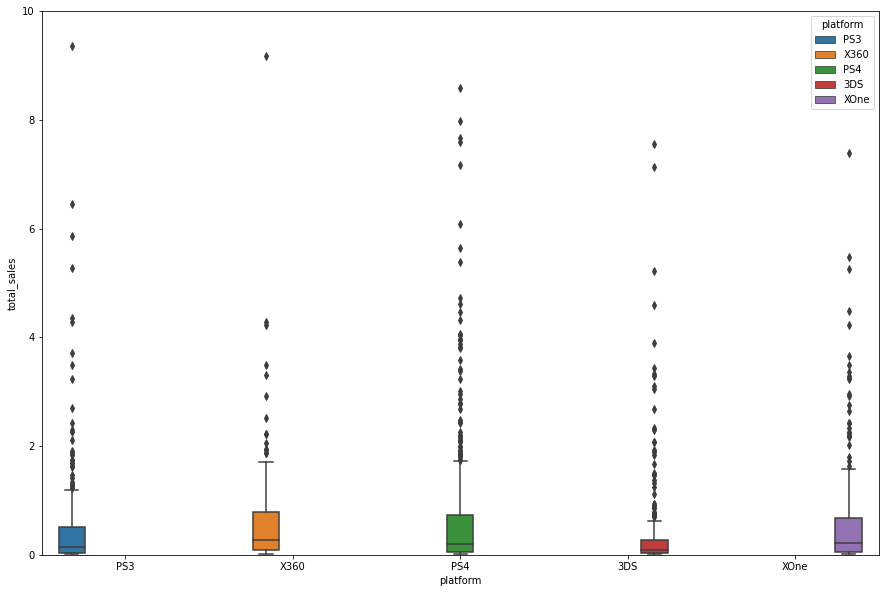

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
#looking at top 5 platforms 
top_5_platforms = ['PS4','PS3','XOne','3DS','X360']
topsales = df2.query('platform in @ top_5_platforms')
sns.boxplot(x='platform',y='total_sales', data=topsales, hue='platform')
plt.ylim(0,10)

PS4 and PS3 have a higher total sales in 2013-2016 compare to the other platforms, but x360 and PS4 have a higher mean with an average of .80 and .79, respectively. PS4 make twice or triple the sale than all other platforms. Every platform has a lot of positive outliers. Outliers can tell us that maybe are errors when collecting or entering data. 

I will choose PS4,PS3,and X360 as my platforms to perform the coefficient correlation calculation because they are most popular and profitable platforms. 

## Correlation Coefficient for PS4

correlation coefficient: -0.03195711020455645


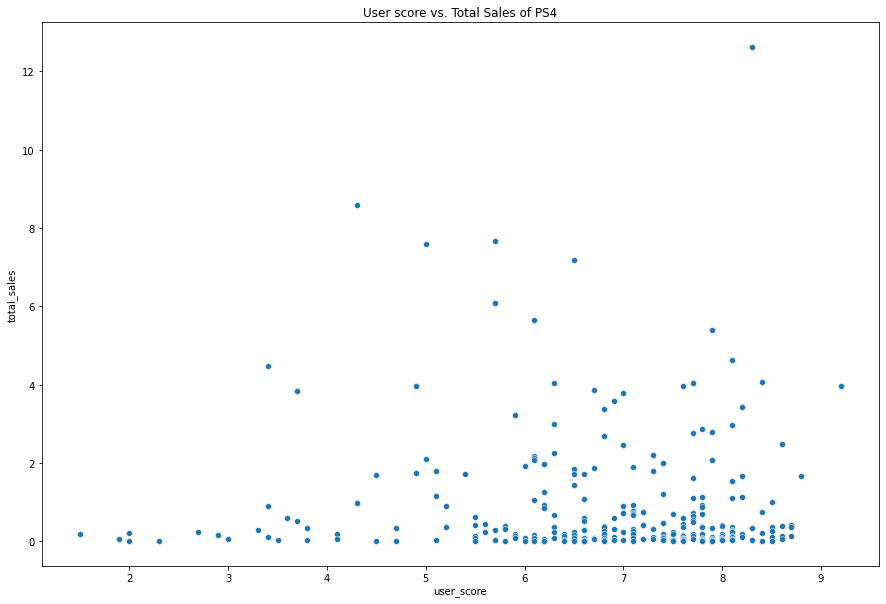

In [26]:
#checking correlation coefficient of user_score 
total_sales_PS4 = df2[(df2['platform']=='PS4') & (df2['user_score'] !=0)]\
                                                        [['user_score','total_sales']]
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x='user_score',y='total_sales', data=total_sales_PS4)
correlation = (df2[(df2['platform']=='PS4') & (df2['user_score']!=0)]['user_score'])\
                                        .corr(df2[df2['platform']=='PS4']['total_sales'])
ax.set_title('User score vs. Total Sales of PS4')
print('correlation coefficient:', correlation)

In [27]:
total_sales_PS4['user_score'].unique()

array([8.3, 4.3, 5.7, 5. , 6.5, 6.1, 7.9, 8.1, 3.4, 8.4, 6.3, 7.7, 9.2,
       4.9, 7.6, 6.7, 3.7, 7. , 6.9, 8.2, 6.8, 5.9, 7.8, 8.6, 7.3, 7.4,
       6.2, 6. , 7.1, 5.1, 6.6, 5.4, 4.5, 8.8, 8.5, 5.2, 7.2, 7.5, 5.5,
       3.6, 5.6, 8. , 8.7, 5.8, 3.8, 4.7, 3.3, 2.7, 2. , 1.5, 4.1, 6.4,
       2.9, 1.9, 3. , 3.5, 2.3])

The correlation coefficient for user_score and total_sale is -.03. This is a very small negative correlation, which mean that the user_score does not heavily impacted the sales of PS4. 

correlation coefficient: 0.40656790206178095


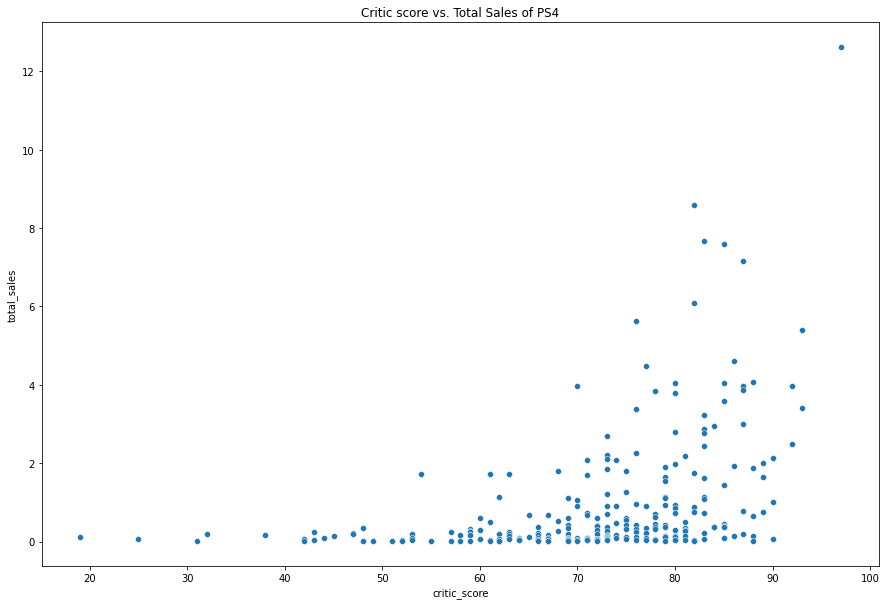

In [28]:
total_sales_PS4_C = df2[(df2['platform']=='PS4') & df2['critic_score']!=0]\
                                                        [['critic_score','total_sales']]
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x='critic_score',y='total_sales', data=total_sales_PS4_C)
correlation = (df2[(df2['platform']=='PS4') & (df2['critic_score']!=0)]['critic_score'])\
                                        .corr(df2[df2['platform']=='PS4']['total_sales'])
ax.set_title('Critic score vs. Total Sales of PS4')
print('correlation coefficient:', correlation)

The correlation coefficient for critic_score and total_sale is .40. This is a small positive correlation, which mean that the critic_score does not heavily impacted the sales of PS4. 

# Correlation Coefficient for PS3

correlation coefficient: 0.002394402735756698


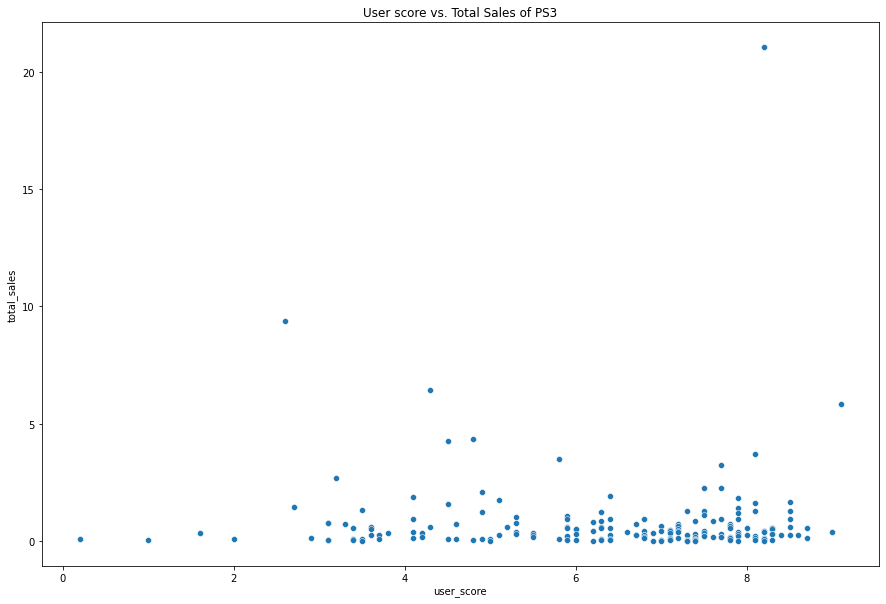

In [29]:
total_sales_PS3 = df2[(df2['platform']=='PS3') & (df2['user_score']!=0)]\
                                                        [['user_score','total_sales']]
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x='user_score',y='total_sales', data=total_sales_PS3)
correlation = (df2[(df2['platform']=='PS3') & (df2['user_score']!=0)]['user_score'])\
                                    .corr(df2[df2['platform']=='PS3']['total_sales'])
ax.set_title('User score vs. Total Sales of PS3')
print('correlation coefficient:', correlation)

In [30]:
total_sales_PS3['user_score'].unique()

array([8.2, 2.6, 4.3, 9.1, 4.8, 4.5, 8.1, 5.8, 7.7, 3.2, 7.5, 4.9, 6.4,
       4.1, 7.9, 5.1, 8.5, 2.7, 3.5, 7.3, 6.3, 5.9, 5.3, 6.8, 7.4, 7.6,
       6.2, 3.1, 7.2, 6.7, 7.8, 4.6, 3.3, 7. , 3.6, 5.2, 8.3, 8.7, 8. ,
       3.4, 6. , 7.1, 9. , 6.6, 3.8, 5.5, 4.2, 1.6, 6.9, 8.4, 3.7, 8.6,
       2.9, 2. , 0.2, 5. , 1. ])

The correlation coefficient for user_score and total_sale is .002. This is an extremely small positive correlation, which mean that the user_score does not impacted the sales of PS3.

correlation coefficient: 0.3342853393371919


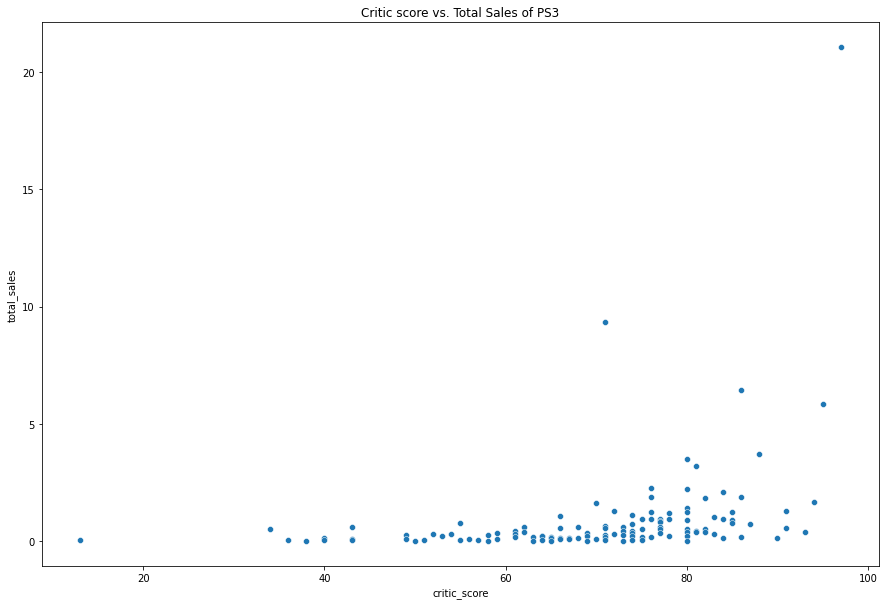

In [31]:
total_sales_PS3_C = df2[(df2['platform']=='PS3') & (df2['critic_score']!=0)]\
                                                    [['critic_score','total_sales']]
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x='critic_score',y='total_sales', data=total_sales_PS3_C)
correlation =(df2[(df2['platform']=='PS3') & (df2['critic_score']!=0)]['critic_score'])\
                                    .corr(df2[df2['platform']=='PS3']['total_sales'])
ax.set_title('Critic score vs. Total Sales of PS3')
print('correlation coefficient:', correlation)

The correlation coefficient for critic_score and total_sale is .33. This is a very small positive correlation, which mean that the critic_score does not impacted the sales of PS3.

In [32]:
total_sales_PS3_C['critic_score'].unique()

array([97., 71., 86., 95., 88., 80., 81., 76., 84., 82., 94., 70., 72.,
       91., 85., 78., 74., 66., 83., 75., 77., 55., 87., 73., 43., 62.,
       68., 34., 61., 93., 69., 59., 52., 54., 49., 58., 64., 53., 63.,
       65., 67., 90., 40., 56., 36., 51., 57., 13., 50., 38.])

## Correlation Coefficientof X360

correlation coefficient: -0.011742185147181342


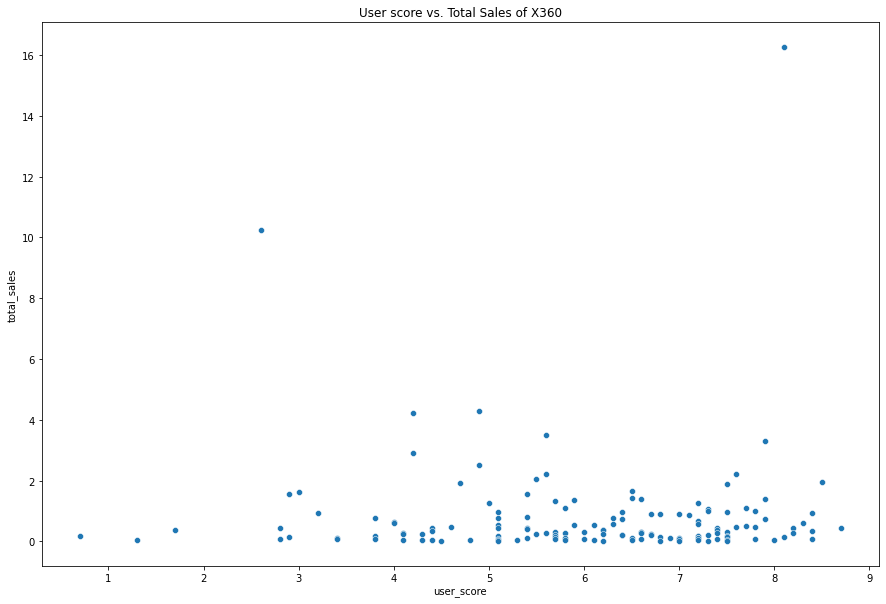

In [33]:
total_sales_X360 = df2[(df2['platform']=='X360') & (df2['user_score']!=0)]\
                                                    [['user_score','total_sales']]
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x='user_score',y='total_sales', data=total_sales_X360)
correlation = (df2[(df2['platform']=='X360') & (df2['user_score']!=0)]['user_score'])\
                                    .corr(df2[df2['platform']=='X360']['total_sales'])
ax.set_title('User score vs. Total Sales of X360')
print('correlation coefficient:', correlation)

The correlation coefficient for user_score and total_sale is -.01. This is a very small negative correlation, which mean that the critic_score does not impacted the sales of X360.

In [34]:
total_sales_X360['user_score'].unique()

array([8.1, 2.6, 4.9, 4.2, 5.6, 7.9, 7.6, 5.5, 8.5, 4.7, 7.5, 6.5, 3. ,
       5.4, 2.9, 6.6, 5.9, 5.7, 7.2, 5. , 7.7, 5.8, 7.3, 7.8, 6.4, 5.1,
       3.2, 8.4, 6.7, 7. , 6.8, 7.1, 6.3, 3.8, 4. , 8.3, 6.1, 4.6, 8.7,
       2.8, 7.4, 8.2, 4.4, 6.2, 1.7, 6. , 4.1, 4.3, 0.7, 6.9, 3.4, 4.8,
       1.3, 5.3, 8. , 4.5])

correlation coefficient: 0.3503445460228664


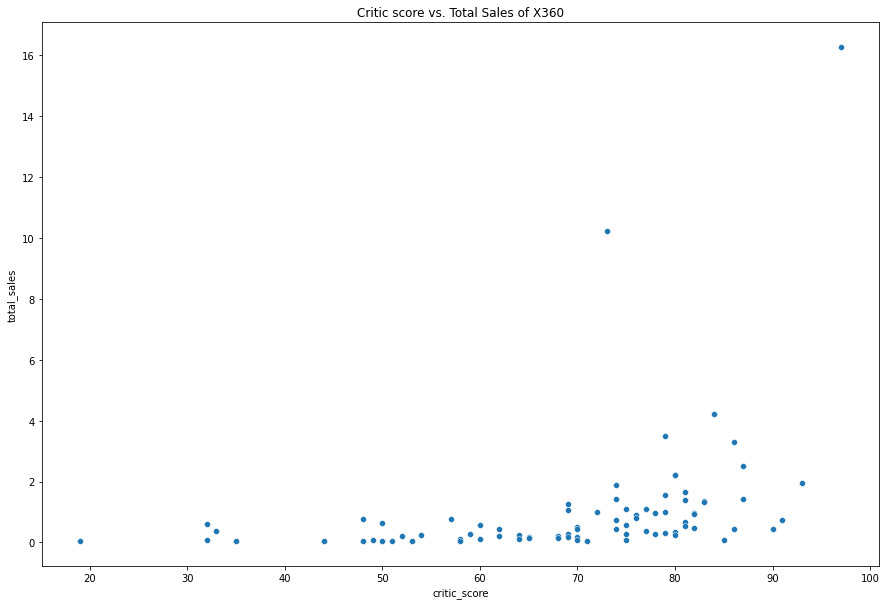

In [35]:
total_sales_X360_C= df2[(df2['platform']=='X360') & (df2['critic_score']!= 0)]\
                                                        [['critic_score','total_sales']]
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x='critic_score',y='total_sales', data=total_sales_X360_C)
correlation = (df2[(df2['platform']=='X360') & (df2['critic_score']!=0)]['critic_score'])\
                                        .corr(df2[df2['platform']=='X360']['total_sales'])
ax.set_title('Critic score vs. Total Sales of X360')
print('correlation coefficient:', correlation)

The correlation coefficient for user_score and total_sale is .35. This is a very small positive correlation, which mean that the critic_score does not impacted the sales of X360.

In [36]:
total_sales_X360_C['critic_score'].unique()

array([97., 73., 84., 79., 86., 87., 80., 93., 74., 81., 83., 69., 75.,
       77., 72., 78., 82., 76., 57., 48., 91., 50., 32., 60., 70., 62.,
       90., 33., 59., 54., 64., 68., 52., 65., 58., 85., 49., 53., 44.,
       71., 19., 51., 35.])

For all three platforms, the critic scores and user scores do not affect the their sales. All critic_scores scatterplots display a small positive correlation while most user_score scatterplots display a small negative correlation except for user_score of PS4 which has a correlation coefficent of .002. Critic scores have a positive correlation while than user scores have negative correlation, we can assume that critic scores have a higher impact on the sales than user scores. Nonetheless, both are small that they do not made much a difference. 

## Finding Top Genres

In [37]:
df2

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,unknown,14.60
4,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
2229,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
2230,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
2231,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01


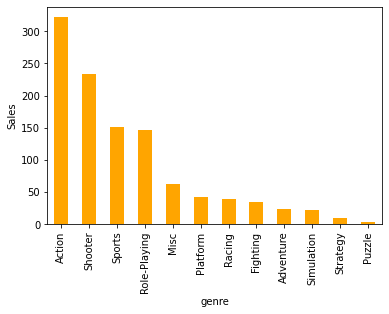

In [38]:
top_genres = df2.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                                         color='orange',
                                                                                         ylabel='Sales')

Top 5 genres are action, sport, shooter, and role-playing. The least profitable genres are strategy amd puzzle. 

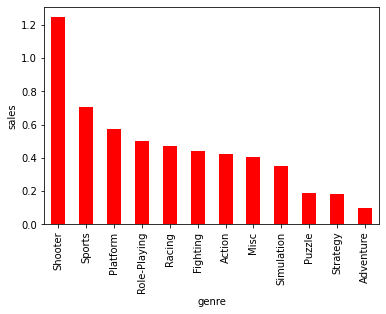

In [39]:
top_genres_means = df2.groupby('genre')['total_sales'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                                               ylabel='sales',
                                                                                               color='red')

The most average profitable genres are shooter, sports and platforms. Shooter has the highest average. For the bar graph above with all the total sales of genre, action makes the most sale; however, with the average sale, it is not in the top 3. 

Genres that are more thrilling, fast paced challenges and sport-based are most likely to make higher sales. Whereas, slow paced genres such as stragedy and puzzle make the least. Shooter and Sports have the highest sales. 

## NA Region:  

<AxesSubplot:title={'center':'Top Genres Sales in Northern America'}, xlabel='genre', ylabel='Sales'>

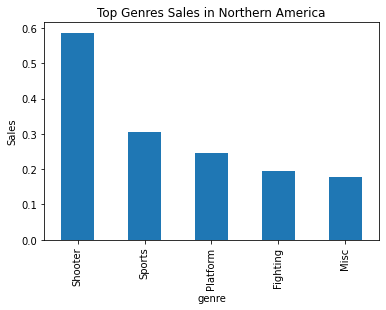

In [40]:
NA_top_5_genre = df2.groupby('genre')['na_sales'].mean().sort_values(ascending = False).head().plot(kind='bar',
                                                                                                   ylabel='Sales',
                                                                                                   title='Top Genres Sales in Northern America')
NA_top_5_genre

The top 5 genres in NA region are shooter, sports, platform, fighting, and misc. 

<AxesSubplot:title={'center':'Top Platforms Sales in Northern America'}, xlabel='platform', ylabel='sales'>

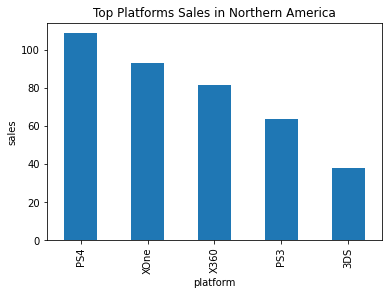

In [41]:
NA_top_5_platform = df2.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head().plot(kind='bar',
                                                                                                        ylabel='sales',
                                                                                                        title='Top Platforms Sales in Northern America')
NA_top_5_platform

Top 5 platforms: PS4,XOne,X360,PS3,3DS

<AxesSubplot:title={'center':'ESRB rating in Northern America'}, xlabel='ESRB rating', ylabel='Sales'>

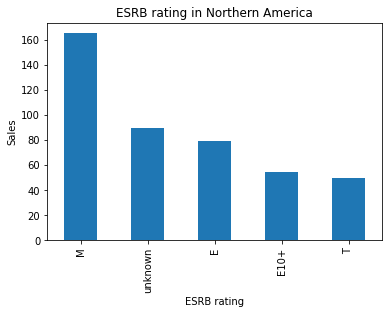

In [42]:
ESRB_NA = df2.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
ESRB_NA.plot(kind='bar',xlabel='ESRB rating', ylabel='Sales', title='ESRB rating in Northern America')

# 2 EU Region: 

<AxesSubplot:title={'center':'5 Top Genres Sales in Europe'}, xlabel='genre', ylabel='sales'>

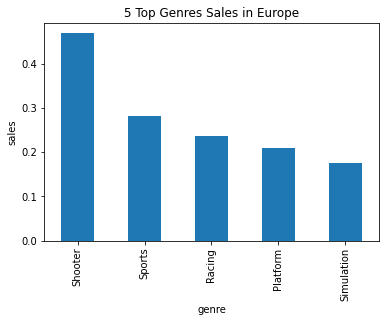

In [43]:
EU_top_5_genre = df2.groupby('genre')['eu_sales'].mean().sort_values(ascending = False).head()
EU_top_5_genre.plot(kind='bar',ylabel='sales', title='5 Top Genres Sales in Europe')

The top 5 genres in EU region are shooter, sports, racing, platform, and  and stimulation. 

<AxesSubplot:title={'center':'Top platforms Sales in Europe'}, xlabel='platform', ylabel='sales'>

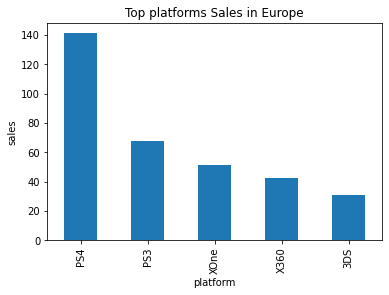

In [44]:
EU_top_5_platform = df2.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()
EU_top_5_platform.plot(kind='bar',ylabel='sales',title='Top platforms Sales in Europe')

Top 5 platform: PS4,PS3,XOne,X360 and 3DS.

<AxesSubplot:title={'center':'ESRB rating in Europe'}, xlabel='rating', ylabel='sales'>

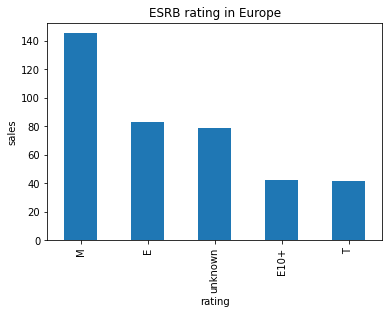

In [45]:
ESRB_EU = df2.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
ESRB_EU.plot(kind='bar',ylabel='sales',title='ESRB rating in Europe')

# 3 JP Region: 

<AxesSubplot:title={'center':'5 Top Genres Sales in Japan'}, xlabel='genre', ylabel='sales'>

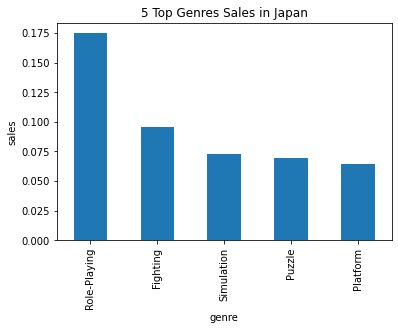

In [46]:
JP_top_5_genre = df2.groupby('genre')['jp_sales'].mean().sort_values(ascending = False).head()
JP_top_5_genre.plot(kind='bar',ylabel='sales', title='5 Top Genres Sales in Japan')

The top 5 genres in EU region are role-playing, fighting, stimulation, puzzle, and platform. Role-playing is the top genre.

<AxesSubplot:title={'center':'Top platforms Sales in Europe'}, xlabel='platform', ylabel='sales'>

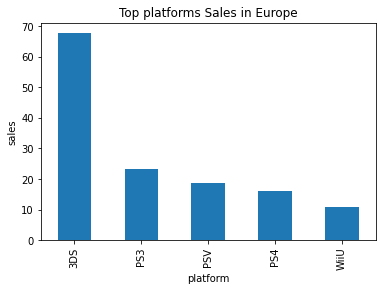

In [47]:
JP_top_5_platform = df2.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head()
JP_top_5_platform.plot(kind='bar',ylabel='sales',title='Top platforms Sales in Europe')

Top 5 platforms: 3DS, PS3, PSV, PS4, WiiU. 

<AxesSubplot:title={'center':'ESRB rating in Japan'}, xlabel='rating', ylabel='sales'>

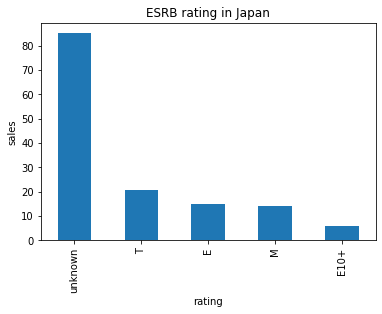

In [48]:
ESRB_JP = df2.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)
ESRB_JP.plot(kind='bar',ylabel='sales',title='ESRB rating in Japan')

Europe and North America have similar genre preferences. With the same 5 genres and similar ranking. Whereas for Japan, role-playing is the most popular genre, with fighting and stimulation in its top 5. EU and NA also have ESRB rating ranking. M, E, and T are the highest based on total sales. For Japan, most of the rating is unknown. Possible reasons to why it is common to have games without ESRB in Japan are they have a different their own game rating systems (CERO and EOCS) or they are not as regulated as the games in other regions. 

## Hypotheses Tests

In [49]:
df2['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [50]:
#testing hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
#H0: average user ratings of the xbox one and PC platforms are equal
#HA: average user ratings of the xbox one and PC platforms are NOT equal 
#setting alpha level .05 because it is a standard cutoff

XOne = df2.loc[(df2['platform']=='XOne') & (df2['user_score'] !=0)]['user_score']
PC = df2.loc[(df2['platform']=='PC')& (df2['user_score'] !=0)]['user_score']
alpha=.05

results = st.ttest_ind(XOne, PC)

print('p-value:', results.pvalue)

if results.pvalue < alpha: 
    print('We reject the null hypothesis')
else: 
    print('We cannot reject the null hypothesis')


p-value: 0.14012658403611647
We cannot reject the null hypothesis


Since the p-value is .14 which is bigger than our alpha value, we cannot reject the null hypothesis. This means at the significance value of .05, average user ratings of the xbox one and PC platforms are not equal.

In [51]:
#testing hypothesis: Average user ratings for the Action and Sports genres are different.
#H0: Average user ratings for the Action and Sports genres are EQUAL.
#HA: Average user ratings for the Action and Sports genres are NOT EQUAL.
#setting alpha level .05 because it is a standard cutoff
avg_Action = df2[(df2['genre']=='Action') & (df2['user_score']!=0)]['user_score']
avg_Sports = df2[(df2['genre']=='Sports') & (df2['user_score']!=0)]['user_score']

alpha = 0.05

results = st.ttest_ind(avg_Action, avg_Sports)

print('p-value:', str(results.pvalue))

if results.pvalue < alpha: 
    print('We reject the null hypothesis')
else: 
    print('We cannot reject the null hypothesis')


p-value: 1.0517832389140023e-27
We reject the null hypothesis


Since the p-value is 1.05e-27 which is smaller than our alpha value, we  reject the null hypothesis. This means average user ratings for the action and sports genres are not equal at siginifance level of .05. 

Conclusion: From the analysis, the PS series continue to maintain their popularity as they continuing to release newer version. Because 2016 data is incomplete, we can assume that PS4 makes more sales that what is collected. Xbox360 and XOne used to be popular in the early 2010s but have declined in sales. The most popular genres in NA and EU are shooting and sports; while fighting and role playing are popular in Japan. This tells us that the users seek thrill and excitement. EU and NA regions have similar ESRB rating, with M, unknown, and E in there top three. Japan is a little different with unknown, T, and E. This can be due to different rating system or less regulation in Japan. NA and EU top popular platforms are PS4, PS3, XONE, and X360. Japan top 3 platforms are 3DS, PS3, and PSV. Na and EU players/consumers have similar preferences in terms of platform, genre, and ESRB ratings. We did two hypothesis tests: 1. average user ratings of the Xbox One and PC platforms are the same 2. average user ratings for the Action and Sports genres are different. I set the null hypothesis as 1.average user ratings of the xbox one and PC platforms are equal and 2.average user ratings for the Action and Sports genres are equal. The first test we cannot reject the null hypothesis because the calculated p-value is bigger than the alpha. While hypothesis #2, we reject the null hypothesis because pvalue is smaller than alpha level. 